In [11]:
import pandas as pd

In [65]:
toronto_crime_dataframe = pd.read_csv("Neighbourhood_Crime_Rates_Boundary_File_.csv")
toronto_crime_dataframe.head()

,OBJECTID,Neighbourhood_Crime_Rates_Neigh,Neighbourhood_Crime_Rates_Hood_,Hood_ID,Neighbourhood,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,...,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_AVG,Homicide_CHG,Homicide_Rate_2018,Population,Shape__Area,Shape__Length
0,1,Yonge-St.Clair,97,97,Yonge-St.Clair,58,38,51,46,61,...,0,0,0,0,NaN,NaN,0.0,3189,1.161315e+06,5873.270507
1,2,York University Heights,27,27,York University Heights,78,101,111,120,138,...,0,2,0,1,1.3,NaN,2.7,36764,1.324666e+07,18504.777616
2,3,Lansing-Westgate,38,38,Lansing-Westgate,216,203,223,226,197,...,0,0,0,0,NaN,NaN,0.0,10242,5.346186e+06,11112.109419
3,4,Yorkdale-Glen Park,31,31,Yorkdale-Glen Park,121,141,136,124,127,...,1,1,1,2,1.2,100%,11.0,18233,6.038326e+06,10079.426837
4,5,Stonegate-Queensway,16,16,Stonegate-Queensway,109,140,124,112,128,...,0,0,0,0,1.0,NaN,0.0,22207,7.946202e+06,11853.189803


In [66]:
toronto_crime_dataframe.shape

(140, 56)

In [67]:
toronto_crime_dataframe.columns

Index(['OBJECTID', 'Neighbourhood_Crime_Rates_Neigh',
       'Neighbourhood_Crime_Rates_Hood_', 'Hood_ID', 'Neighbourhood',
       'Assault_2014', 'Assault_2015', 'Assault_2016', 'Assault_2017',
       'Assault_2018', 'Assault_AVG', 'Assault_CHG', 'Assault_Rate_2018',
       'Auto_Theft_2014', 'Auto_Theft_2015', 'Auto_Theft_2016',
       'Auto_Theft_2017', 'Auto_Theft_2018', 'AutoTheft_AVG', 'AutoTheft_CHG',
       'AutoTheft_Rate_2018', 'BreakandEnter_2014', 'BreakandEnter_2015',
       'BreakandEnter_2016', 'BreakandEnter_2017', 'BreakandEnter_2018',
       'BreakandEnter_AVG', 'BreakandEnter_CHG', 'BreakandEnter_Rate_2018',
       'Robbery_2014', 'Robbery_2015', 'Robbery_2016', 'Robbery_2017',
       'Robbery_2018', 'Robbery_AVG', 'Robbery_CHG', 'Robbery_Rate_2018',
       'Theft_Over_2014', 'Theft_Over_2015', 'Theft_Over_2016',
       'Theft_Over_2017', 'Theft_Over_2018', 'TheftOver_AVG', 'TheftOver_CHG',
       'TheftOver_Rate_2018', 'Homicide_2014', 'Homicide_2015',
       'Homic

In [68]:
toronto_crime_dataframe.iloc[0]

OBJECTID                                        1
Neighbourhood_Crime_Rates_Neigh    Yonge-St.Clair
Neighbourhood_Crime_Rates_Hood_                97
Hood_ID                                        97
Neighbourhood                      Yonge-St.Clair
Assault_2014                                   58
Assault_2015                                   38
Assault_2016                                   51
Assault_2017                                   46
Assault_2018                                   61
Assault_AVG                                  50.8
Assault_CHG                                   33%
Assault_Rate_2018                          1912.8
Auto_Theft_2014                                28
Auto_Theft_2015                                32
Auto_Theft_2016                                22
Auto_Theft_2017                                46
Auto_Theft_2018                                69
AutoTheft_AVG                                39.4
AutoTheft_CHG                                 50%


In [69]:
Tornoto_neighborhoods =  toronto_crime_dataframe[['Neighbourhood','Assault_Rate_2018','AutoTheft_Rate_2018','BreakandEnter_Rate_2018','Robbery_Rate_2018','TheftOver_Rate_2018','Homicide_Rate_2018','Population']]

In [70]:
Tornoto_neighborhoods.columns


Index(['Neighbourhood', 'Assault_Rate_2018', 'AutoTheft_Rate_2018',
       'BreakandEnter_Rate_2018', 'Robbery_Rate_2018', 'TheftOver_Rate_2018',
       'Homicide_Rate_2018', 'Population'],
      dtype='object')

In [71]:
import seaborn
import matplotlib.pyplot as plt

In [72]:

# froup by neighboorhoods within the same borough
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
neighbourhouds = tables[0]
neighbourhouds.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [73]:
neighbourhouds = neighbourhouds[neighbourhouds.Borough != 'Not assigned']

In [74]:
neighbourhouds = neighbourhouds[['Neighbourhood','Borough']]

In [75]:
Tornoto_borough = neighbourhouds.merge(Tornoto_neighborhoods, left_on ='Neighbourhood', right_on= 'Neighbourhood')

In [76]:
Tornoto_borough.columns

Index(['Neighbourhood', 'Borough', 'Assault_Rate_2018', 'AutoTheft_Rate_2018',
       'BreakandEnter_Rate_2018', 'Robbery_Rate_2018', 'TheftOver_Rate_2018',
       'Homicide_Rate_2018', 'Population'],
      dtype='object')

In [77]:
Tornoto_borough.shape

(36, 9)

In [83]:
# population vs neighborhoods
Tornoto_neighborgood_pop = Tornoto_borough[['Borough','Population']]
Tornoto_neighborgood_pop = Tornoto_neighborgood_pop.groupby(['Borough']).sum()
Tornoto_neighborgood_pop.head()

,Population
Borough,
Central Toronto,11459
Downtown Toronto,11243
East Toronto,28378
East York,8352
Etobicoke,49354


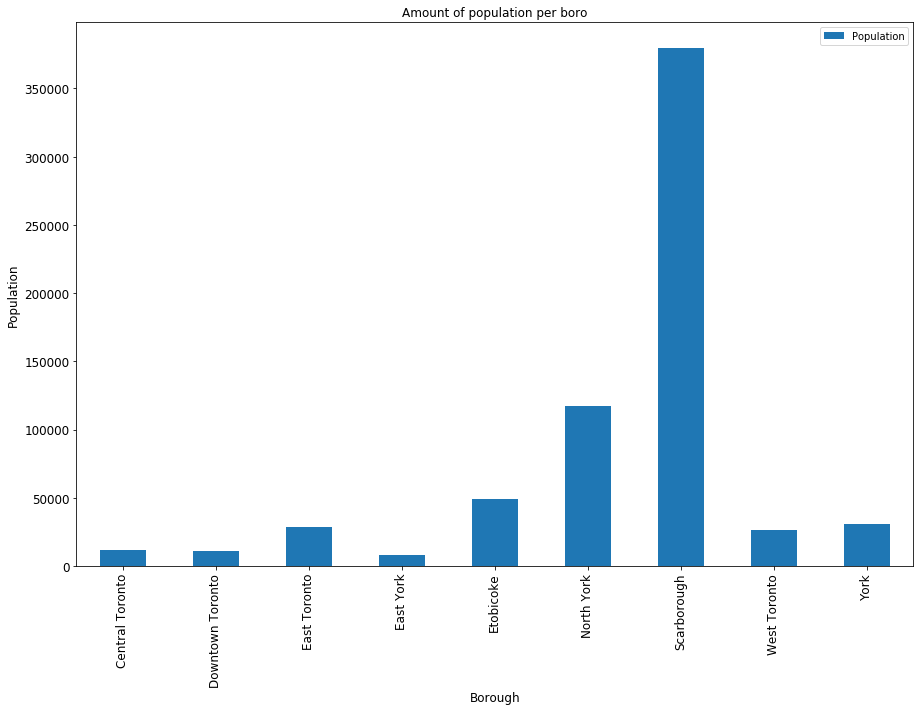

In [84]:

#Tornoto_neighborgood_copy =  Tornoto_neighborgood_copy.groupby([Tornoto_neighborgood_copy.index.get_level_values(0)])['Population']

ax = Tornoto_neighborgood_pop[['Population']].plot(kind='bar', title ="Amount of population per boro", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Population", fontsize=12)
plt.show()

In [88]:
Tornoto_neighborgood_crime= Tornoto_borough[['Borough', 'Assault_Rate_2018', 'AutoTheft_Rate_2018',
       'BreakandEnter_Rate_2018', 'Robbery_Rate_2018', 'TheftOver_Rate_2018',
       'Homicide_Rate_2018']]
Tornoto_neighborgood_crime= Tornoto_neighborgood_crime.groupby(['Borough']).sum()
Tornoto_neighborgood_crime.head()

,Assault_Rate_2018,AutoTheft_Rate_2018,BreakandEnter_Rate_2018,Robbery_Rate_2018,TheftOver_Rate_2018,Homicide_Rate_2018
Borough,,,,,,
Central Toronto,628.3,471.2,244.3,218.2,34.9,0.0
Downtown Toronto,667.1,106.7,418.0,97.8,80.0,17.8
East Toronto,1610.4,77.5,831.6,274.9,105.7,0.0
East York,1616.4,1364.9,718.4,502.9,179.6,0.0
Etobicoke,3701.4,1049.6,1121.4,771.0,243.5,23.4


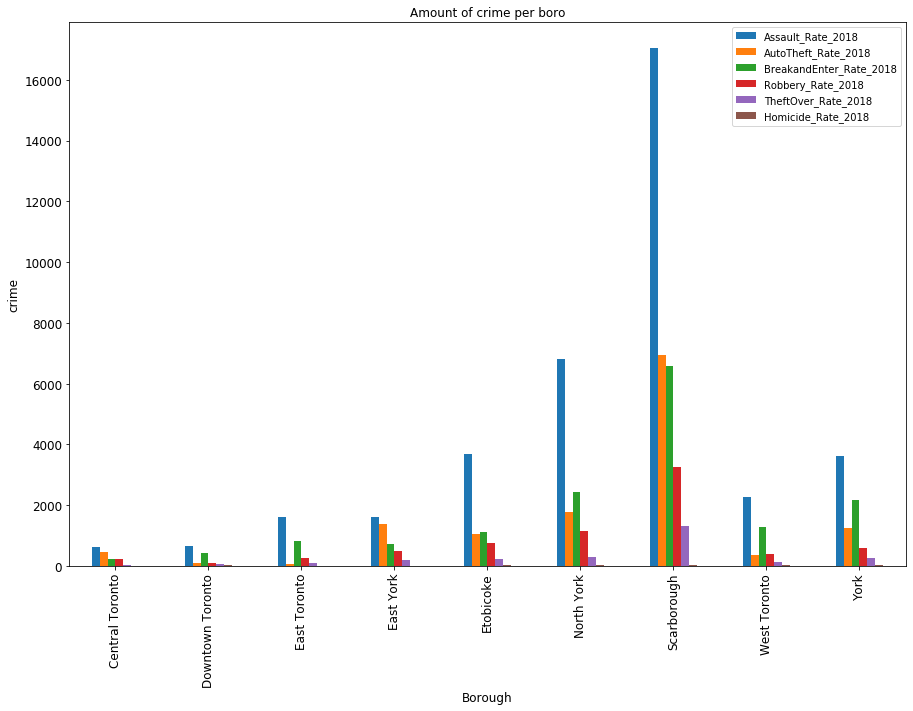

In [91]:
ax = Tornoto_neighborgood_crime[['Assault_Rate_2018', 'AutoTheft_Rate_2018',
       'BreakandEnter_Rate_2018', 'Robbery_Rate_2018', 'TheftOver_Rate_2018',
       'Homicide_Rate_2018']].plot(kind='bar', title ="Amount of crime per boro", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("crime", fontsize=12)
plt.show()